# CelebA

In [1]:
import torch
from torchvision import transforms
from torchvision.datasets import CelebA

C:\Users\jvialard\anaconda3\envs\pytorch\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Load dataset
transform = transforms.Compose([
   transforms.Resize(64),
   transforms.CenterCrop(64),
   transforms.ToTensor(),
   transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)), # between [-1, 1]
])

testset = CelebA("./", split="test", target_type="attr", transform=transform, download=False)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

# DCGan

In [3]:
import torch
from dcgan.dcgan import Generator, Discriminator

In [4]:
generator = Generator()
generator.load_state_dict(torch.load("./checkpoints/dcgan_netG_1101231129.ckpt"))
generator.eval()

Generator(
  (main): Sequential(
    (0): ConvTranspose2d(100, 512, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (7): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU()
    (9): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (10): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU()
    (12): ConvTranspose2d(64, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (13): Tanh()
  )
)

# Visualization

## Generate

In [5]:
import numpy as np
import matplotlib.pyplot as plt

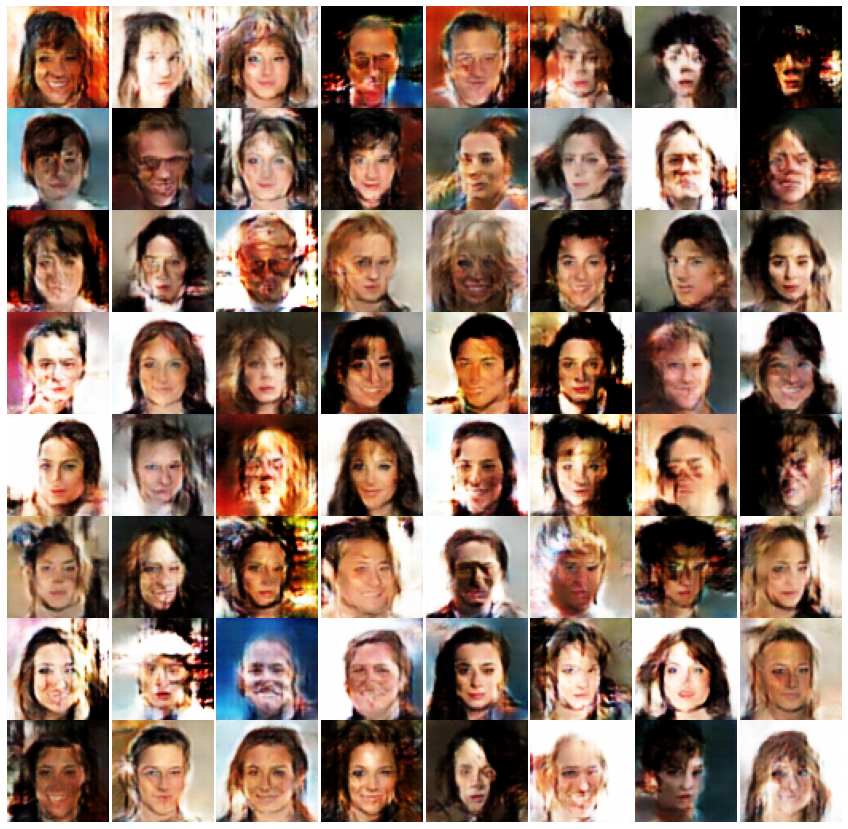

In [6]:
with torch.no_grad():
    noise = torch.randn(64, 100, 1, 1, device="cpu")
    fake = generator(noise)   
    
    fake = fake.detach().cpu().numpy()
    
    f, axarr = plt.subplots(8, 8, figsize=(15, 15))
    for index, axarr_ in enumerate(axarr):
        for i in range(4):
            axarr_[2*i].imshow((np.moveaxis(fake[8*index+2*i], 0, 2) + 1)/2)
            axarr_[2*i+1].imshow((np.moveaxis(fake[8*index+2*i+1], 0, 2) + 1)/2)       
        [e.axis('off') for e in axarr_]
    f.subplots_adjust(wspace=0, hspace=0)